# Exploratory Analysis

## Objetivo

1. Análisis de las variables
1. Si los alumnos de portugués aprobaran la tercera evaluación
1. ¿Con cuánta nota?

Para cumplir con los objetivos tenemos que trabajar con los datos de los alumnos que estudian portugués. Ya que tenemos que obtener la nota con la que aprueban la tercera evaluación, no nos vale con un algoritmo de clasificación binaria. Trabajaremos para intentar predecir la nota y si es mayor que la mitad (20 es la nota más alta posible) consideraremos que el alumno aprueba.

## Cargamos los datos

Primero importamos panda y cargamos el dataset de los datos de los alumnos que estudian portugués. Mostramos el tamaño del dataset y una muestra de los datos.

In [1]:
import pandas as pd

df = pd.read_csv("data/student-por.csv")
print(df.shape)
df.head(1)

(649, 33)


,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,4,0,11,11


## Selección de características

Disponemos de los siguientes datos en el dataset:

* **school** - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
* **sex** - student's sex (binary: 'F' - female or 'M' - male)
* **age** - student's age (numeric: from 15 to 22)
* **address** - student's home address type (binary: 'U' - urban or 'R' - rural)
* **famsize** - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
* **Pstatus** - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
Fedu** - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Medu** - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 – 5th to 9th grade, 3 – secondary education or 4 – higher education)
* **Mjob** - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **Fjob** - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other')
* **reason** - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
* **guardian** - student's guardian (nominal: 'mother', 'father' or 'other')
* **traveltime** - home to school travel time (numeric: 1 - <15 min., 2** - 15 to 30 min., 3** - 30 min. to 1 hour, or 4** - >1 hour)
* **studytime** - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
* **failures** - number of past class failures (numeric: n if 1<=n<3, else 4)
* **schoolsup** - extra educational support (binary: yes or no)
* **famsup** - family educational support (binary: yes or no)
* **paid** - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
* **activities** - extra-curricular activities (binary: yes or no)
* **nursery** - attended nursery school (binary: yes or no)
* **higher** - wants to take higher education (binary: yes or no)
* **internet** - Internet access at home (binary: yes or no)
* **romantic** - with a romantic relationship (binary: yes or no)
* **famrel** - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
* **freetime** - free time after school (numeric: from 1 - very low to 5 - very high)
* **goout** - going out with friends (numeric: from 1 - very low to 5 - very high)
* **Dalc** - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **Walc** - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
* **health** - current health status (numeric: from 1 - very bad to 5 - very good)
* **absences** - number of school absences (numeric: from 0 to 93)

Vamos a analizar cómo afectan cada una de las variables al porcentaje de aprobados. Lo primero es crear una columna de si han aprovado o no la tercera evaluación.

In [46]:
df['is_approved'] = df.G3 >= 10
def compare_feature(columun):
    is_approved_pivot = df.pivot_table(index=columun,values="is_approved")
    is_approved_pivot.plot.bar()
    plt.show()

Primero analizamos los aprobados en función del colegio. Vemos que no hay una clara diferencia, así que **ignoramos esta característica**.

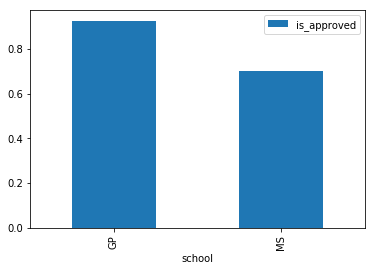

In [49]:
compare_feature("school")

Analizamos los aprobados en función del sexo. Vemos que no hay una clara diferencia, así que **ignoramos esta característica**.

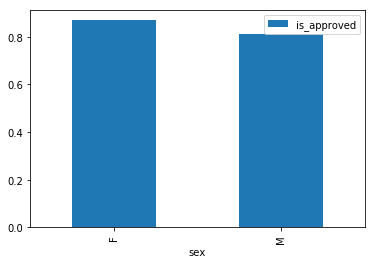

In [51]:
compare_feature("sex")